<a href="https://colab.research.google.com/github/rsudiplive/EDA_CapstoneProjects/blob/main/_FINAL_COLAB_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

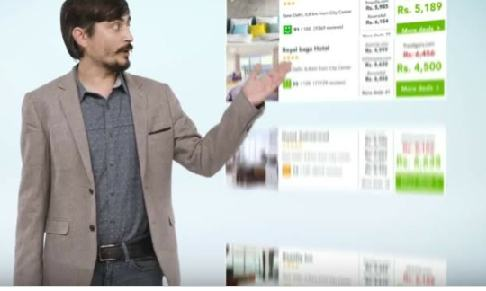

##<b> Kya Aapne kabhi online Hotel book kiya hai!!!</b>
##<b>We all have seen this man and have heard about this line atleast once, hav'nt we!</b>
##<b>Well, we dont work for Trivago, and we may not suggest you hotels, but we can defintely share our analysis on hotel booking so that you can have quality time with your loved ones! Why not, it's the season of love!! </b>
##<b>Everyone wants to be in a perfect hotel, with the most amazing ambience, and an amazing reputation. Well, this dataset will help you compare more than thousands of hotels in the last three years, and help you have a perfect experience.So, hurry up and book your tickets to your dream destination, and let handle your dream hotels </b>

**You all may think, why waste time looking into this analysis, well we will make this interesting for you, we promise! Here is what you all can expect in our analysis:**

My team has tried to break this huge dataset into the simplest form possible so that you can have a basic understanding about the various aspects of the hotels you are going to choose from. It's easy to overlook some important data and visualizatuion graphs corresponding to our dataset, and we don't want such to happen, we only want you all to have the best hotels, we promise! We are far from reporting you a rigorous data analysis as a senior data scientist does, but I hope this data will be useful for the community.


*   Understanding the dataset: We have over a hundred thousand columns in this dataset, so we will look over each columns and get a basic info about our dataset first.
*   Hotel Types: next we will look into the types of hotel, customers loves spending time in and generate every dat possible that will help you decide which hotel to book rooms in.
*   Cleaning our dataset: We will do a basic cleaning and will deal with missing data and outliers.


That's it for now. Time to dig right in, here let me show you the way.









In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from datetime import datetime
from datetime import date
from numpy import mean

from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_name = '/content/drive/MyDrive/Colab Notebooks/dat/Hotel Bookings.csv'
df_hotel = pd.read_csv(path_name)

In [ ]:
df_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## So, why spend time checking these much data!!

In order to understand these huge collections of data, we have gathered some questions related to this dataset in an excel sheet which we believe will match maximum number of your queries regarding hotels in our database.
Let's find out what can you all expect in our excel sheet:

*   **Questions**:  When I say questions, I mean questions based on every single possible question that pops on your mind while planning your dream destination. This column covers questions and queries on everything you are worried about!
*   **Conclusion**: This column will give you a descriptive as well a numerical analysis on the questions in the corresponding column. If you are too busy, and dont have time going through the entire analysis page, or you find our analysis too complex, this sheet is for you.

See, we have got your hotel needs covered!! 

While reading through the columns of our dataset, many such questions may come to your mind, like:


*  Do i really need to go through this much data just to book a hotel?
*  Why do I care what ADR is, I dont work in a hotel!!
*  What hotel should I book into, this hotel has more number of bookings, but greater number of cancellations as well!

We are here to answer all such problems and questions you will be having in your mind.
We have tried and explained every column that's relevant and will help you have an awesome experience. We have also included a number of visualization graphs, that will help you visualize and have a better understanding of data,

We believe pictures speak louder than words!
Well now that we are all ready, let's start









In [ ]:
df_hotel.head() #checking head of the dataframe

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df_hotel.shape #let's check the shape as well

(119390, 32)

This Dataset contains a total of 119386 rows with 25 variant features(not all variables are important to us) we'll restrict to only those columns which are important to us in our analysis. <br>

Each row represent a particular booking made by a guest in a particular hotel.There are two hotel's Resort and City Hotel where all the bookings are made.

Let's proceed step by step:




## <b> Our first job is to explore the variables that are present in our dataset. We have discussed every relevent column in detail and have also explored unique data present in each relevant column of our dataset.

We would request you to go through this to have a better understanding of the operations we would be performing on these columns

##**Variables Identification & Data Exploration**

In [ ]:
df_hotel.info() #information about all the variables in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#unique hotels, categorical
df_hotel['hotel'].unique() 

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df_hotel['is_canceled'].unique() #categorical, 0-> False(booking not cancelled) & 1-> True(is cancelled)
#We'll try to label those for better understanding in the next steps.

array([0, 1])

In [ ]:
df_hotel['arrival_date_year'].unique() #three years

array([2015, 2016, 2017])

In [ ]:
df_hotel['arrival_date_month'].unique() #all months present

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
df_hotel.meal.unique() #not a clear understanding(also not important)

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df_hotel.market_segment.value_counts() #counts of different market segments

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
df_hotel.distribution_channel.value_counts() #also the count of different distribution channels as well

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
df_hotel.is_repeated_guest.value_counts() 
#1->> indicates the booking has been done made by same guests
#0->> indicates the booking has been made by unique guests(different)

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [ ]:
df_hotel.customer_type.unique() #customer types present

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df_hotel.customer_type.value_counts() #count of various customer types

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
df_hotel.adr= df_hotel.adr.astype('int64') #converting the adr type from float to int

### **Something looks fishy in this ADR column, let's have a check. I sense the presence of outliers...**

In [ ]:
df_hotel.adr.describe()

count    119390.000000
mean        101.626761
std          50.523114
min          -6.000000
25%          69.000000
50%          94.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

**This was what I was sensing. I have the ability to smell outliers just by looking at a dataset!!**


Looks there is negetive values for adr which can't be possible for a price/night of a hotel. Possibly there can be large outlier values present at extremes. We need to remove those before having a smooth operation.

**Making a histogram to have a better understanding of what outliers are:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


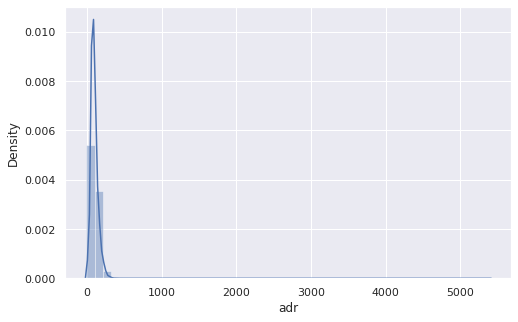

In [ ]:

sns.set(rc={"figure.figsize": (8, 5)})
sns.distplot(df_hotel.adr) #distribution for adr


This distribution curve depicts that it is positively skewed. We need to make it as symmetrical as possible.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_hotel['adr'].skew())
print("Kurtosis: %f" % df_hotel['adr'].kurt())

Skewness: 10.540908
Kurtosis: 1014.366011


High value of Skewness and Kurtosis shows there's large amount of outliers on adr value.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


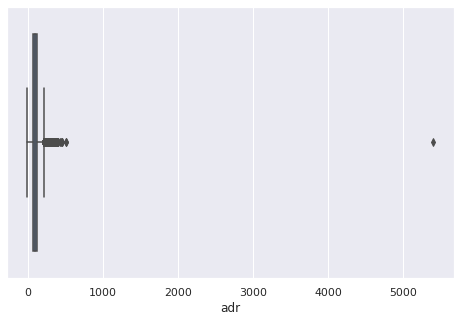

In [ ]:
sns.boxplot(df_hotel['adr']) #box plot on adr column to check for high range & low range outliers

**Let's have a look at the heatmap for understanding the dependencies within each variables**

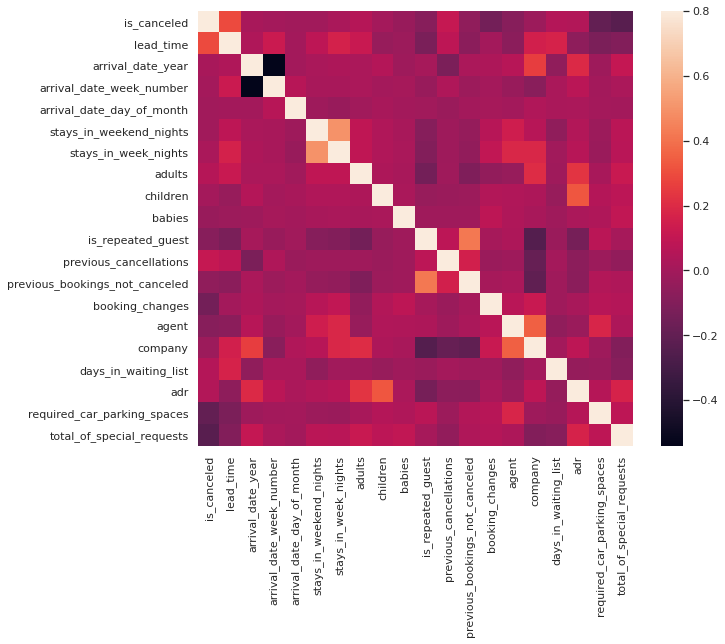

In [ ]:
#correlation matrix
corrmat = df_hotel.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Looking at the heatmap, at first sight we can tell is_cancelled and lead_time shows positive correlation. Also, stay_in_week_nights & stay_in_weekend_nights are positively correlated with each other. previous_bookings_not_cancelled and is_repeated_guest shows correlation between each other. Also the arrival_X variables signifies the same thing, so we'll try to convert each of these variables in a single datetime column for handy and easy analyis moving forward. Agent & company are same understandings(Although these numerical variables have not much significance in our analysis) <br>

Also the type of guests wheather an adult or a child has some correlation with adr(price). Well, we'll look into all those.

# Data Pre-processing:

Trying to convert the arrival_date_month with months in strings to its corresponding numeric representations for months, to make it available in the datetime column

In [ ]:
map_dic = {'January': 1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

def convertmonth(col):
  if col in map_dic.keys():
    value = map_dic[col]

  return value

In [ ]:
df_hotel['Month'] = df_hotel.apply(lambda x: convertmonth(x['arrival_date_month']),axis=1)

In [ ]:
#best time for a hotel booking depends on month and year mostly
#converting the year and month to datetime obj

df_hotel['Date_of_arrival'] = pd.to_datetime(df_hotel[['arrival_date_year','Month','arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1))

In [ ]:
#also, adding a column with a year-month format
df_hotel['Year_Month']= df_hotel['Date_of_arrival'].apply(lambda x: x.strftime("%Y-%m-%d")[:7])

In [ ]:
df_hotel.head(3) #checking the head of the dataframe with the new columns added

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Month,Date_of_arrival,Year_Month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01,7,2015-07-01,2015-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01,7,2015-07-01,2015-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02,7,2015-07-01,2015-07


**Let's do some labelling with the columns: is_canceled & is_repeated_guest for better understanding**

In [ ]:
#let's label the column values for is_canceled:
def label_cancel(col):
  map_cancel={0:'Not_cancelled',1:'Cancelled'}
  if col in map_cancel.keys():
    value=map_cancel[col]
  return value

In [ ]:
label_cancel(0)

'Not_cancelled'

In [ ]:
#let's label the column values for is_repeated_guest as well:
def label_repeat(col1):
  map_repeated={0:'Guest_not_repeated',1:'Repeated_Guests'}
  if col1 in map_repeated.keys():
    value1=map_repeated[col1]
  return value1

In [ ]:
df_hotel['is_canceled'] = df_hotel['is_canceled'].apply(lambda x: label_cancel(x))
df_hotel['is_repeated_guest'] = df_hotel['is_repeated_guest'].apply(lambda x: label_repeat(x))

# Data Cleaning: Missing Values and Outliers

In [ ]:
#we're good to remove the extra arrival_date_day_of_month & arrival_date_year since we've already maintained those in seperate datetime fields
#also we can drop company(many null values and also not required for analysis),agent(there's not much significance in our analysis) columns as well.

df_hotel.drop(columns=['arrival_date_day_of_month','arrival_date_year','company','agent'],inplace= True)

In [ ]:
#Also we can remove the numerical month since we already have a year-month format
df_hotel.drop(columns=['Month'],inplace=True)

In [ ]:
#we can fill with 0 childrens for missing values in children column since it contain only 4null values
df_hotel['children'].fillna(0,inplace=True)

In [ ]:
df_hotel.children.isnull().any()

False

In [ ]:
#also the children column is of float type, we can convert to int
df_hotel['children']=df_hotel['children'].astype('int')

In [ ]:
#we can remove the rows with adults, children, babies whose values are 0, as there won't be any booking that exists without any guest. 
df_hotel.drop(df_hotel[(df_hotel['adults']+df_hotel['children']+df_hotel['babies'])==0].index,inplace=True)

In [ ]:
df_hotel.head(3) #checking the head of the modified df 

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month
0,Resort Hotel,Not_cancelled,342,July,27,0,0,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,3,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07
1,Resort Hotel,Not_cancelled,737,July,27,0,0,2,0,0,BB,PRT,Direct,Direct,Guest_not_repeated,0,0,C,C,4,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,2015-07-01,2015-07
2,Resort Hotel,Not_cancelled,7,July,27,0,1,1,0,0,BB,GBR,Direct,Direct,Guest_not_repeated,0,0,A,C,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01,2015-07


In [ ]:
df_hotel.describe() #looking at the overall statistics of all the variables

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,104.109227,27.163376,0.927053,2.499195,1.859206,0.104043,0.007961,0.087191,0.137094,0.218799,2.321215,101.764542,0.062553,0.571504
std,106.875450,13.601107,0.995117,1.897106,0.575186,0.398836,0.097509,0.844918,1.498137,0.638504,17.598002,50.421738,0.245360,0.792876
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000
25%,18.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000
50%,69.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000
75%,161.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,53.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000


### **Handling Outliers**

**Let's try and remove the outliers in ADR(price/night)**





In [ ]:
#using percentiles:
min_threshold,max_threshold= df_hotel.adr.quantile([0.01,0.999])
min_threshold,max_threshold

(0.0, 326.0)

In [ ]:
df_hotel[df_hotel.adr<min_threshold] #looking at adr values less than the min threshold(low-range outliers on adr)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month
14969,Resort Hotel,Not_cancelled,195,March,10,4,6,2,0,0,BB,GBR,Groups,Direct,Repeated_Guests,0,2,A,H,2,No Deposit,0,Transient-Party,-6,0,0,Check-Out,2017-03-15,2017-03-05,2017-03


**Thank all Heavens, we all have a single outlier value which is less than the minimum threshold**

In [ ]:
df_hotel[df_hotel.adr>max_threshold] #similarly looking at the extreme values of adr(high-range outliers on adr)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month
3712,Resort Hotel,Not_cancelled,52,December,53,0,1,2,0,0,HB,PRT,Direct,Direct,Guest_not_repeated,0,0,E,F,1,No Deposit,0,Transient,332,1,1,Check-Out,2016-01-01,2015-12-31,2015-12
7419,Resort Hotel,Cancelled,13,August,33,1,3,3,1,0,HB,ESP,Online TA,TA/TO,Guest_not_repeated,0,0,H,H,0,No Deposit,0,Transient,369,0,0,Canceled,2016-07-27,2016-08-08,2016-08
7676,Resort Hotel,Cancelled,140,August,34,2,2,3,1,0,HB,FRA,Online TA,TA/TO,Guest_not_repeated,0,0,H,H,1,No Deposit,0,Transient,329,0,0,Canceled,2016-07-12,2016-08-20,2016-08
9727,Resort Hotel,Cancelled,31,December,53,0,2,2,0,0,Undefined,PRT,Groups,Direct,Guest_not_repeated,0,0,E,E,0,No Deposit,0,Transient-Party,340,0,1,Canceled,2016-12-30,2016-12-30,2016-12
9728,Resort Hotel,Cancelled,95,December,53,0,2,2,2,0,BB,PRT,Online TA,TA/TO,Guest_not_repeated,0,0,G,G,0,No Deposit,0,Transient,384,0,0,Canceled,2016-09-26,2016-12-30,2016-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112700,City Hotel,Not_cancelled,35,May,21,0,3,3,2,0,BB,CHE,Direct,Direct,Guest_not_repeated,0,0,G,G,1,No Deposit,0,Transient,335,0,0,Check-Out,2017-05-28,2017-05-25,2017-05
112707,City Hotel,Not_cancelled,14,May,21,0,3,3,0,0,BB,ECU,Direct,Direct,Guest_not_repeated,0,0,G,G,0,No Deposit,0,Transient,335,0,0,Check-Out,2017-05-28,2017-05-25,2017-05
114535,City Hotel,Not_cancelled,2,June,25,0,3,2,0,0,BB,NLD,Direct,Direct,Guest_not_repeated,0,0,G,G,0,No Deposit,0,Transient,333,0,0,Check-Out,2017-06-23,2017-06-20,2017-06
115541,City Hotel,Not_cancelled,24,July,27,2,3,2,3,0,HB,ROU,Direct,Direct,Guest_not_repeated,0,0,G,G,1,No Deposit,0,Transient,338,0,0,Check-Out,2017-07-07,2017-07-02,2017-07


**We have 116 columns that exceed the maximum threshold of our ADR data!! Dont. worry,  We will remove them so that we can provide you all a perfect data analysis on the ADR values**

In [ ]:
df_hotel_adr_new=df_hotel[(df_hotel.adr>min_threshold) & (df_hotel.adr<max_threshold)]
df_hotel_adr_new.head(2) #dataframe with the new value of price having negligible outliers

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Date_of_arrival,Year_Month
2,Resort Hotel,Not_cancelled,7,July,27,0,1,1,0,0,BB,GBR,Direct,Direct,Guest_not_repeated,0,0,A,C,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01,2015-07
3,Resort Hotel,Not_cancelled,13,July,27,0,1,1,0,0,BB,GBR,Corporate,Corporate,Guest_not_repeated,0,0,A,A,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,2015-07-01,2015-07


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


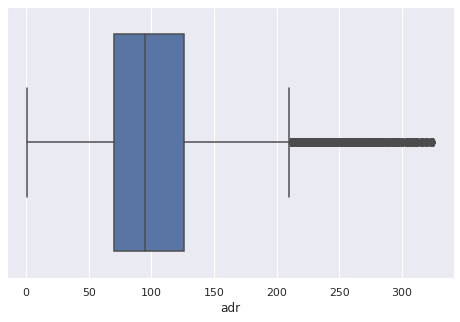

In [ ]:
#let's look at the box plot now, for the new adr without outliers!
sns.boxplot(df_hotel_adr_new['adr'])

Now, this is what a perfect box plot looks like, without outliers ofcourse.Well, the box-plot for adr now looks good with no extreme values present.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


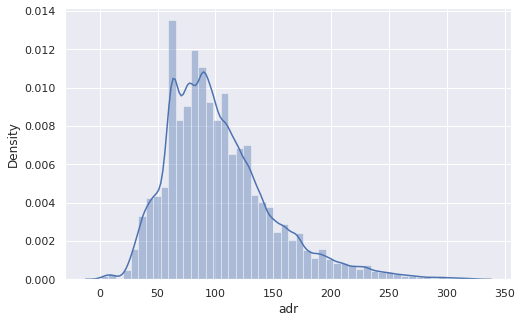

In [ ]:
# Let's check our data without outliers using a histogram curve

sns.distplot(df_hotel_adr_new['adr'])

We can see the distribution curve has a normal distribution and is almost symmetrical. The outliers are removed using the percentile approach and now we can finally operate with our dataset.

## <b>Phew!! We have finally cleaned up our dataset!
## Now that we have finished cleaning up the mess, Let's dive into the interesting part,</b>

## <b>Yes, you have guessed it right:


## Our data on the land of Hotels</b>


Things that you can expect in this section:


*   Divided our entire dataset into yearly data followed by monthly data
*   Plotted graphs between booking numbers vs Month Name so as to get an idea about the busiest time in hotels and when to start booking for your dream hotels.



### Let's first divide our entire dataset with respect to the years 2015, 206 and 2017 so that you all can have a better experience while booking your tickets:

In [ ]:
#subsetting each booking data with bookings made in each years!

booking_2015_subset_df = df_hotel[(df_hotel['Date_of_arrival'].dt.year == 2015)]
booking_2016_subset_df = df_hotel[(df_hotel['Date_of_arrival'].dt.year == 2016)]
booking_2017_subset_df = df_hotel[(df_hotel['Date_of_arrival'].dt.year == 2017)]

In [ ]:
#  Let's further break our yearly data into monthly data for the year 2015.

monthly_bookings_vol_2015 = booking_2015_subset_df["Year_Month"].value_counts()
monthly_bookings_vol_2015.sort_index(inplace = True)

Text(0, 0.5, 'Number of bookings')

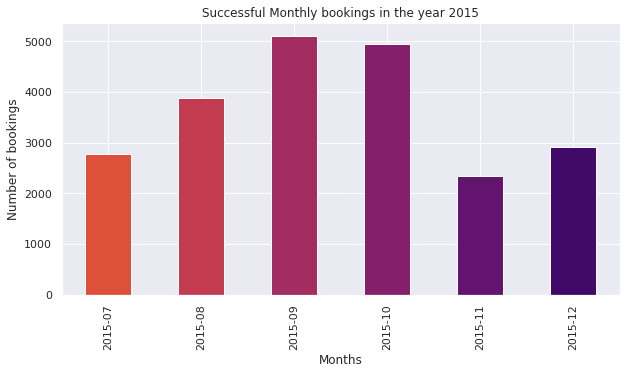

In [ ]:
#  let's plot a bar graph between the number of bookings and the months in 2015
color = cm.inferno_r(np.linspace(.4, .8, 6))
plt.rcParams['figure.figsize'] = (10,5)
monthly_bookings_vol_2015.plot(kind = 'bar', color = color).grid(zorder = 0)
plt.title("Successful Monthly bookings in the year 2015")
plt.xlabel("Months")
plt.ylabel("Number of bookings")

In [ ]:
#  Let's further break our yearly data into monthly data for the year 2016

monthly_bookings_vol_2016 = booking_2016_subset_df["Year_Month"].value_counts()
monthly_bookings_vol_2016.sort_index(inplace = True)

Text(0, 0.5, 'Number of bookings')

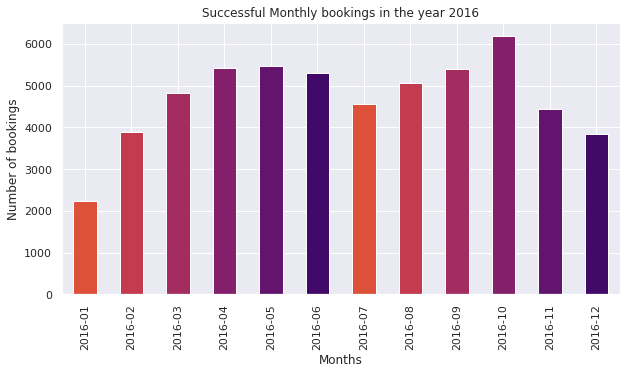

In [ ]:
#  let's plot a bar graph between the number of bookings and the months in 2016
color = cm.inferno_r(np.linspace(.4, .8, 6))
plt.rcParams['figure.figsize'] = (10,5)
monthly_bookings_vol_2016.plot(kind = 'bar', color = color).grid(zorder = 0)
plt.title("Successful Monthly bookings in the year 2016")
plt.xlabel("Months")
plt.ylabel("Number of bookings")

In [ ]:
#  Let's further break our yearly data into monthly data for the year 2017

monthly_bookings_vol_2017 = booking_2017_subset_df["Year_Month"].value_counts()
monthly_bookings_vol_2017.sort_index(inplace = True)

Text(0, 0.5, 'Number of bookings')

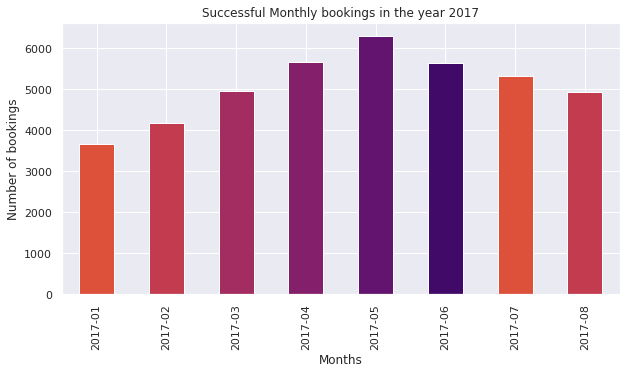

In [ ]:
#  let's plot a bar graph between the number of bookings and the months in 2017
color = cm.inferno_r(np.linspace(.4, .8, 6))
plt.rcParams['figure.figsize'] = (10,5)
monthly_bookings_vol_2017.plot(kind = 'bar', color = color).grid(zorder = 0)
plt.title("Successful Monthly bookings in the year 2017")
plt.xlabel("Months")
plt.ylabel("Number of bookings")

<b>Conclusion: </b>
The three above plots give a numerical analysis on the busiest times in hotels. Clearly, in the year 2015, September saw the highest number of bookings. However in the next year people started booking more in October with over 6000 bookings. In the year 2017, bookings exceeded 6000 in the month of May. however, January has the lowest booking numbers in both the years 2016 and 2017.
So hurry up, if you are planning your journey in the next two months!

## <b>Now, it's time to introduce you to the finalists of our hotel data.
## Our top two contenders:</b>

## <b>Hotel Resort and Hotel City</b>

### <b>Overall Successful booking ratio between Hotel City and Hotel Resort</b>

Analysis that you should expect under this section:
*  This data will give you a direct comparison about Hotel Resort and Hotel City and the booking ratio between these two hotels
*  We will be subsetting our dataframe by eliminating all those rows consisting booking cancelations. The ratio will give you a direct comparison between Number of overall successful bookings in both the hotels in all the three years.






In [ ]:
# First things first:
# Dividing the 'Canceled' and 'Not canceled' bookings

df_hotel_not_cancelled = df_hotel[df_hotel['is_canceled']=='Not_cancelled']
df_hotel_cancelled = df_hotel[df_hotel['is_canceled']=='Cancelled']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Total Booking (%)'),
 Text(0.5, 0, 'Hotels'),
 Text(0.5, 1.0, 'Overall Bookings comparison in Hotel City and Hotel Resort')]

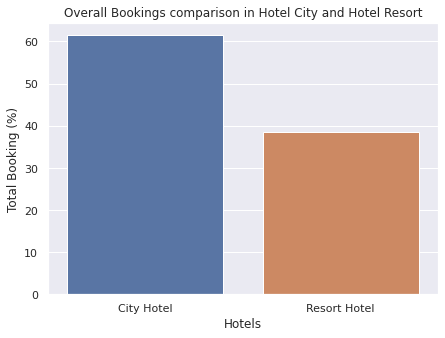

In [ ]:
x2= df_hotel_not_cancelled['hotel'].value_counts().index
y2= df_hotel_not_cancelled['hotel'].value_counts()/df_hotel_not_cancelled['hotel'].value_counts().sum()*100
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x2,y2)
ax.set(xlabel='Hotels',ylabel='Total Booking (%)', title='Overall Bookings comparison in Hotel City and Hotel Resort')

**Conclusion:**
The total overall percentage of successful bookings in Hotel City is about 60 percent and that of Hotel Resort is 40 percent.


But...


don't count out Hotel Resort just yet, it's not the numbers that matter most, but quality as well. We will be discussing more on the successful bookings in detail in the next section and will cover both monthly and yearly data in each of the hotels.

## <b> Here is the data that you all have been waiting for...

## We want each one of our viewers to have successful bookings with zero cancellations. That will only be possible once you have a sneek-peak into our yearly data analysis on successful bookings for both the Hotels. </b>


Things you can expect in this section:


*   We have gathered data about all the succesfull bookings in both Hotel Resort and City, and have compared them with the help of a bar chart.
*   The bar chart will not only give you a yearly analysis but will also have a clear view of the most successful bookings in a single Month.




In [ ]:
#subsetting each booking data with bookings made in each years!
booking_2015_subset_df_no_cancelations = df_hotel_not_cancelled[(df_hotel_not_cancelled['Date_of_arrival'].dt.year == 2015)]
booking_2016_subset_df_no_cancelations = df_hotel_not_cancelled[(df_hotel_not_cancelled['Date_of_arrival'].dt.year == 2016)]
booking_2017_subset_df_no_cancelations = df_hotel_not_cancelled[(df_hotel_not_cancelled['Date_of_arrival'].dt.year == 2017)]

### Starting with the year 2015:

Text(0.5, 0, 'Successful bookings count')

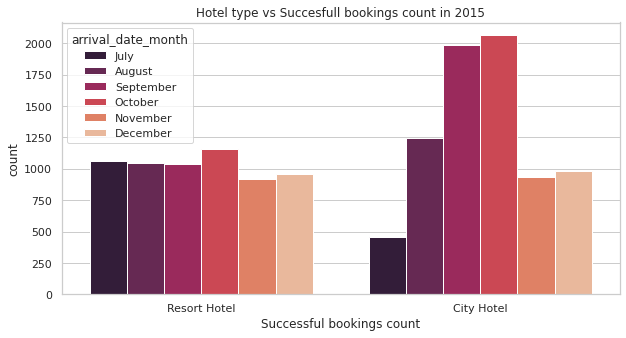

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=booking_2015_subset_df_no_cancelations,x='hotel',hue='arrival_date_month', palette = 'rocket')
plt.title("Hotel type vs Succesfull bookings count in 2015")
plt.xlabel("Successful bookings count")

In 2015 for **Resort Hotel**, we can see most guests made sucessfull bookings in the month of **October**. followed by **July**. <br>

In 2015 for **City hotel** most succesfull bookings were made in the month of **October** followed by **September**.


### Year 2016:

Text(0.5, 0, 'Successful bookings count')

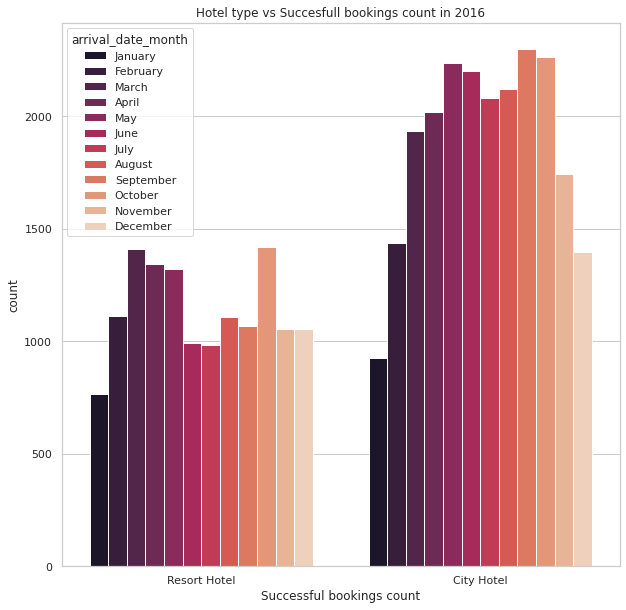

In [ ]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,10)
sns.countplot(data=booking_2016_subset_df_no_cancelations,x='hotel',hue='arrival_date_month', palette = 'rocket')
plt.title("Hotel type vs Succesfull bookings count in 2016")
plt.xlabel("Successful bookings count")

In 2016 for **Resort Hotel**, we can see most guests made sucessfull bookings in the month of **March** followed by **October**. <br>

In 2016 for **City hotel** most succesfull bookings were made in the month of **September** followed by **October**.

## Year 2017:

Text(0.5, 0, 'Successful bookings count')

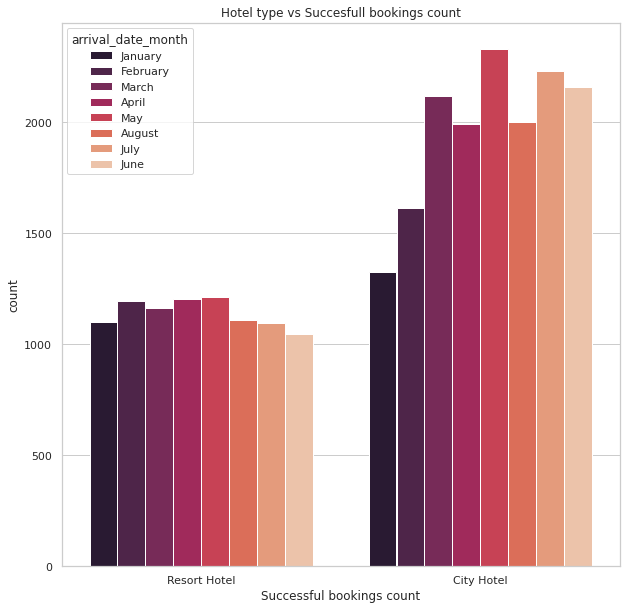

In [ ]:
sns.set_style('whitegrid')
sns.countplot(data=booking_2017_subset_df_no_cancelations,x='hotel',hue='arrival_date_month', palette = 'rocket')
plt.title("Hotel type vs Succesfull bookings count")
plt.xlabel("Successful bookings count")

**Conclusion:** In 2017 for **Resort Hotel**, we can see most guests made sucessfull bookings in the month of **May** followed by **February** & **April**. <br>

In 2017 for **City hotel** most succesfull bookings were made in the month of **May** followed by **July**.


### The visualizations of the three above plots gives us a descriptive analysis of zero cancelation bookings.

### However, I feel like something important is missing in the above plots, but I can't figure out what!! 

### Ahh, yess... I got it! It's the numerical figures that are missing. In the next plot, you will get a numerical figure so as to relate with bookings in the two Hotels we got.

### **Let's have a better and a clearer picture of what we were talking about:**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


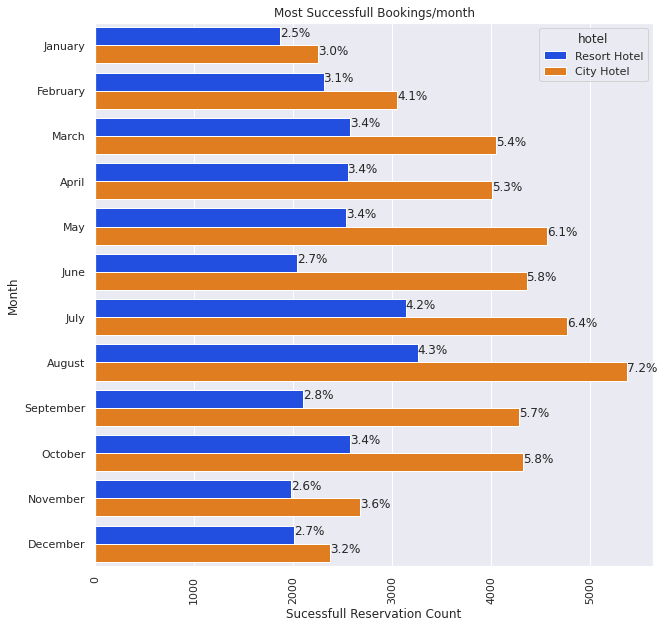

In [ ]:
# stored months in a categorical order 

ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_hotel_not_cancelled['arrival_date_month'] = pd.Categorical(df_hotel_not_cancelled['arrival_date_month'], categories=ordered_months, ordered=True)
sns.set_style("darkgrid")
ax= sns.countplot(y='arrival_date_month',hue='hotel',data = df_hotel_not_cancelled,palette= 'bright')

#applying a for loop in the column of arrival month in the dataframe storing successful bookings data to get the percentages
total = len(df_hotel_not_cancelled['arrival_date_month'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)  
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Most Successfull Bookings/month')
plt.xlabel('Sucessfull Reservation Count')
plt.xticks(rotation=90)
plt.ylabel('Month')

plt.show()

**Conclusion:**

City hotel followed by Resort Hotel had the most successfull bookings in July and August in all three years. In July, City Hotel had an increase of bookings to 6.4% while Resort Hotel had an increase of bookings to 4.2% in the same month. During August, City Hotel had an increase of bookings to 7.2% while Resort Hotel had an increase of bookings to 4.3% in the same month.

The table above has six columns labeled **'special requests'** starting from 0 and ending at 1. These numbers denote **the number of special requests** made by a customer

## **Average daily Rate (ADR)**

Now, let's talk about payments:

More than three-fourths of the total customers hardly have any idea about what an ADR is! Well, that's why we are here! We are here to clarify every single questions you have, even on ADR!

**The fisrt question that comes to mind is, What exactly is ADR and how can ADR values be crucial for my booking?**

The **Average Daily Rate**, also known as ADR is a term popular among hotel industries. It acts as an indicator of the hotel’s overall performance and profits. ADR helps hotel owners determine the average rate of the rooms sold over a specific period of time. This duration can be variable – it may be 30-days, a quarter, or even a year.

A hotel’s average daily rate gives a clear picture of the overall income generated. It takes into account all the transactions that were successfully carried out against the total number of rooms. ADR is the total revenue generated from the total number of occupied rooms for a particular duration.


Things to expect from this section:


*  We will be plotting a graph of the adr values verus each Month on the entire dataset for both the hotels.
*  By doing the above operation, you will get an estimate of the month with the highest ADR values in both the hotels in all the three years.
*  We will also draw a histogram curve so as to understand the mean adr of both the hotels in the entire dataset.








In [ ]:
#  Rearranging the months in a categorical order before plotting them
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

df_hotel_adr_new['Month Name'] = pd.Categorical(df_hotel_adr_new['arrival_date_month'], categories=months, ordered=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(14.13860008818341, 0.5, 'Adr values')

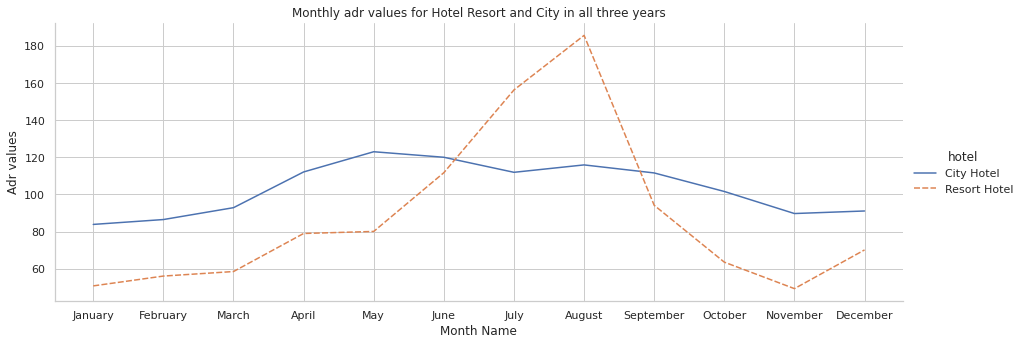

In [ ]:
# Plotting the adr vs Months of all the three years in our dataset
# using the dataframe without outliers

hotel_adr_df = pd.DataFrame(df_hotel_adr_new.groupby(['hotel','Month Name'])['adr'].mean())
sns.set_style("whitegrid")
sns.relplot(data= hotel_adr_df, x="Month Name", y="adr", hue = 'hotel', style = 'hotel', kind="line", height=4.5, aspect= 2.8)
plt.title("Monthly adr values for Hotel Resort and City in all three years")
plt.ylabel("Adr values")


The **conclusion** that we can draw for the above plot is this that in all the three years, adr of Hotel City is distributed across and is almost the same at every months with the highest being in the month of May.
However, in Hotel Resort the adr has some steep rises, with the lowest being in January and the highest in August, with a maximum adr value of over 180.

Text(0.5, 0, 'adr values')

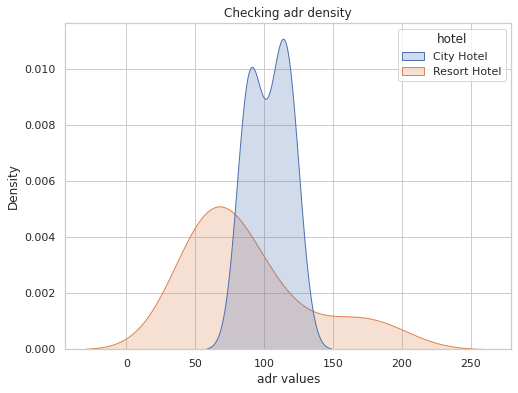

In [ ]:
# getting an idea of the over distribution of ADR in both the hotels
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.kdeplot(x = 'adr', hue='hotel', data = hotel_adr_df,shade=True)
plt.title("Checking adr density")
plt.xlabel("adr values")

The **conclusion** we can draw from the curve above is this, that the adr values of Hotel City is mostly in between 60 and 140, and the mean adr in all the three years is around 100. However, the curve for Hotel Resort is distributed, with the minimum at 0 and maximum at 250, and the mean value at 65.

The bottomline is this that if the ADR price of City Hotels remains almost constant with an average value of over 110. However, the ADR values of Hotel Resort is distributed, the ADR values drop as low as 0 and rises as high as 250, with a mean of about 65.

## <b>A quick question,

##<b> Do you know the most important factor that determines the success rate of a hotel?? Is it the ADR, the ambience or a huge jacuzzi bath in your room??


## Well, it's not any of those. The most important factor in any business are Customers. The ultimate aim of a hotel is to have maximum customers with the least possible complaints.</b>

## Want to see the details we have on customer's ?? Let's hope in...</b>

Things to expect in this section:


*  We have discussed about the type of customers who love to visit in both these hotel
*  We have also analysed which hotel do they prefer on weekdays and weekends and are there repeated customers in any of the hotels or not

*  Which room type gets booked the most number of times?
*  Which countries have the maximum customers?

And many more...




### Let's start of the type of customers who loves to visit these hotels and who does not

In [ ]:
# Let's look at the unique set of customer type
df_customers = df_hotel['customer_type'].value_counts().reset_index().rename(columns = {'index':'Customer Type','customer_type':'Customer booking Counts'})
df_customers

,Customer Type,Customer booking Counts
0,Transient,89476
1,Transient-Party,25088
2,Contract,4072
3,Group,574


Here they are...Seems like Transient Groups loves to stay in hotels, can't say the same for Contract and Groups I am afraid...Let's put them in a plot

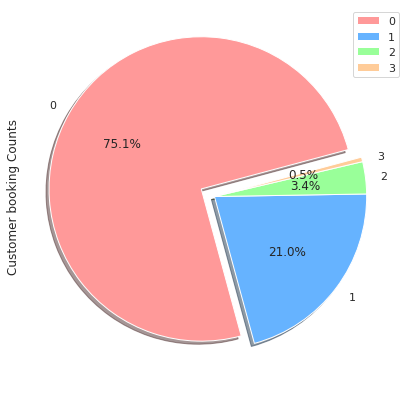

In [ ]:
# Plotting a pie chart for the type of customers in the dataset
my_colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
my_explode = (0.1,0,0,0)
plot = df_customers.plot.pie(y='Customer booking Counts', figsize=(10, 7), startangle=15, shadow = True, autopct='%1.1f%%', explode = my_explode, colors = my_colors)

**Conclusion:** The above pie chart shows that almost 75% of the customers are Transient Customers, followed by Transient-Parties with a percentage of 21. Contract and it seems like 'Group' does'nt like to stay in hotels that much

### **Previously, we showed you the percentage of bookings of each customer types. Let's get into the details of the bookings of each customer types and see the number of days they stayed. We will be considering both the weekend and weekdays values while analyzing the number of stays.**

In [ ]:
#total stays(including weekdays & weekends)
df_hotel_not_cancelled['total_stays']= df_hotel_not_cancelled['stays_in_week_nights'] + df_hotel_not_cancelled['stays_in_weekend_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


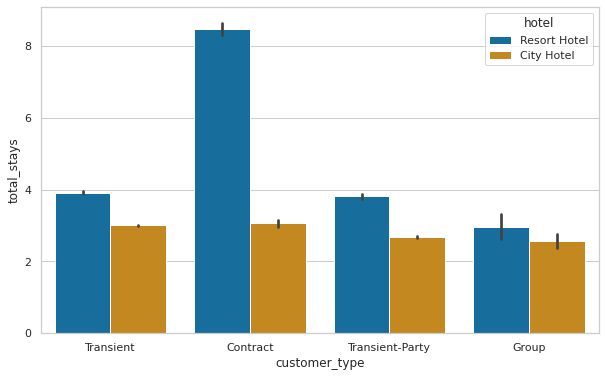

In [ ]:
#total_stays:
f,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = "customer_type", y = "total_stays", data = df_hotel_not_cancelled, hue = "hotel", palette = 'colorblind')

**Conclusion:** As we found out earlier from the nature of stays during weekends and weekdays, Guests love to stay at Resort hotel and most of them belonging to Contract customer_type(can be corporate contracts/any contracts made before reservation between the hotel and the customer), stayed for more than 8-nights on an average followed by Transient customer type with around 4-days and they keep relocating from one place to another.

### Everyone wants to have a deluxe room, with a 43 inch LED television and a swimming pool just outside their rooms in the hotel they want to stay. Well I cannot promise you whether these hotels have a pool or not, but let me have a look at the type of rooms they have and the number of bookings of each room type.

In [ ]:
# Using groupby operation to find out the number of rooms reserved by customers
reserved_type = df_hotel.groupby('reserved_room_type')['hotel'].count()
df_reserved = pd.DataFrame(reserved_type).reset_index()
df_reserved = df_reserved.rename(columns={'reserved_room_type': 'Room Type', 'hotel': 'Number of rooms reserved'})


# Using groupby operation to find out the number of rooms assigned to customers by hotel authorities
assigned_type = df_hotel.groupby('assigned_room_type')['hotel'].count()
df_assigned = pd.DataFrame(assigned_type).reset_index()
df_assigned = df_assigned.rename(columns={'assigned_room_type': 'Room Type', 'hotel': 'Number of rooms assigned'})

# merging the above two dataframes
reserved_assigned_df = pd.merge(df_reserved, df_assigned, on='Room Type').head(7)

In [ ]:
reserved_assigned_df

,Room Type,Number of rooms reserved,Number of rooms assigned
0,A,85873,74020
1,B,1115,2154
2,C,931,2370
3,D,19179,25309
4,E,6519,7798
5,F,2894,3751
6,G,2092,2549


 Let's have a pictoral view of the above data to have a better understanding of rooms reserved to assigned.

Text(0.5, 1.0, 'Comparison graph for rooms assigned and rooms reserved')

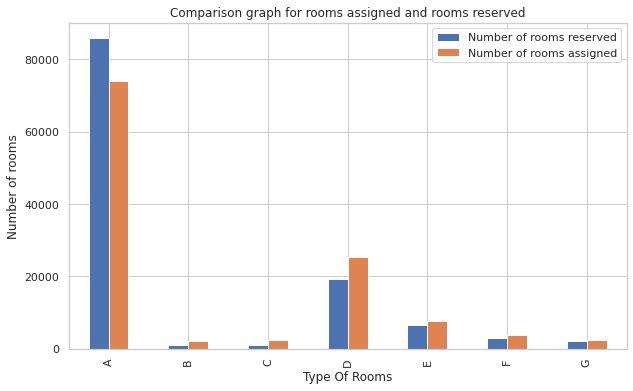

In [ ]:
# Lets plot a bar graph comparing the reserved and the assigned rooms for different room types

plt.rcParams['figure.figsize'] = (10,6)
reserved_assigned_df.plot(x = 'Room Type', kind = 'bar').grid(zorder = 0)
plt.xlabel("Type Of Rooms")
plt.ylabel("Number of rooms")
plt.title("Comparison graph for rooms assigned and rooms reserved")

**Conclusion:** From the bar plot above, we can see that Room A has been booked the most number of times(almost 85000 bookings) but the sad thing is not all of them gets assigned to the customers even after booking them(about 11000). However, in the other room types we can observe that there are more rooms assigned to them than reserved.


The number of customers booking for room A is out of the chart it seems, so if you are planning to have a deluxe suite, it seems you don't have time to spare.

### <b>Now that, you have thought about your dream destination, figured out which hotel you want to check in, figured out which restaurants to go into, have you planned the number of days you want to stay in the hotel??


### Confused about staying there for a day, or for  week? Cannot decide whether to go on weekdays or weekends??</b>


###<b> Well I can help you with this. Let me provide you with a detailed analysis on the average stays in each hotel. We will also provide you informstion on which hotel to book if you are planning to visit on weekdays or weekends.</b>



### First things first, let's check the average number of stays of a customer:

In [ ]:
# calculating the toatl number of stays

total_nights = df_hotel_not_cancelled['stays_in_weekend_nights']+ df_hotel_not_cancelled['stays_in_week_nights']
x7=total_nights.value_counts().index[:10]
y7=total_nights.value_counts()[:10]/total_nights.value_counts().sum()*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


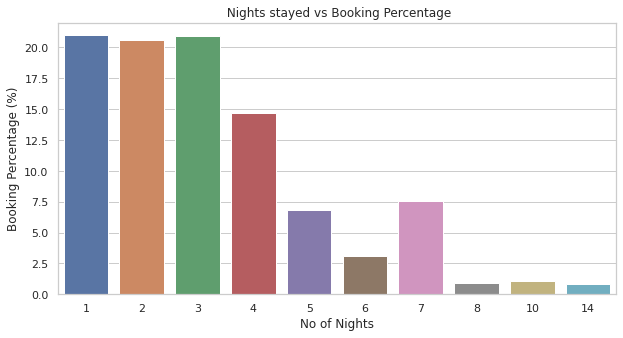

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('No of Nights')
ax.set_ylabel('Booking Percentage (%)')
ax.set_title(' Nights stayed vs Booking Percentage')
sns.barplot(x7,y7)

Most of the customers stay for one to three nights. More than 60% of the customers stay in hotels for about three days.

This data gives us the data on the average stays but does'nt provide us any necessary information on the Hotel Type and whether to go on weekdays or weekends. We will be discussing this analysis in the next section

##<b> Weekdays or Weekends...??? </b>

### ""Should I take a week off and go visit somewhere or why waste my leaves when I can go visit on weekends...""

### We are here to help you with this dilemma. This analysis will help you decide when to make reservations for your dream venue.

Things to expect in this section:


1.   We have made a detailed analysis on the number of people staying in each Hotel both in weekdays and weekends




 **Weekdays data for Hotel City and Hotel Resort**

Text(0.5, 1.0, 'People staying in Hotel City during weekdays')

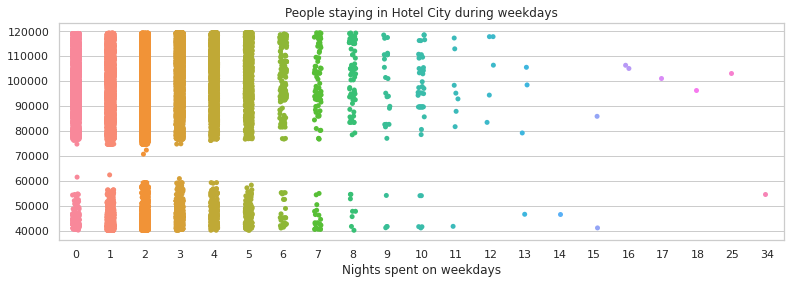

In [ ]:
# Subsetting for Hotel City on weekdays
week_days_df_city = df_hotel_not_cancelled[df_hotel_not_cancelled['hotel']=='City Hotel']['stays_in_week_nights']

# making a stripplot to get the booking density during weekdays in City Hotel
f,ax = plt.subplots(figsize=(13,4))
ax = sns.stripplot(y= week_days_df_city.index,x= week_days_df_city.values)
plt.xlabel("Nights spent on weekdays")
plt.title("People staying in Hotel City during weekdays")

Text(0.5, 1.0, 'People staying in Hotel Resort during weekdays')

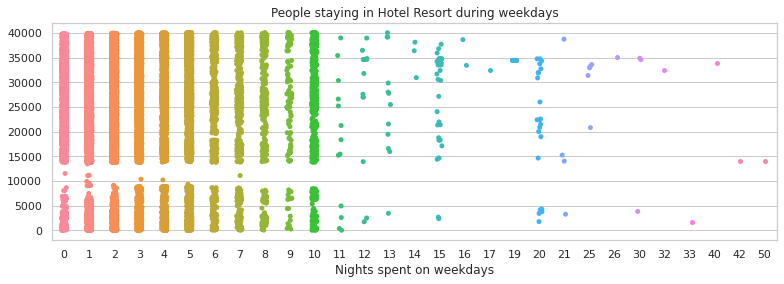

In [ ]:
# Subsetting for Hotel Resort on weekdays
week_days_df_res = df_hotel_not_cancelled[df_hotel_not_cancelled['hotel']=='Resort Hotel']['stays_in_week_nights']

# making a stripplot to get the booking density during weekdays in Resort Hotel
f,ax = plt.subplots(figsize=(13,4))
ax = sns.stripplot(y= week_days_df_res.index,x= week_days_df_res.values)
plt.xlabel("Nights spent on weekdays")
plt.title("People staying in Hotel Resort during weekdays")

 **Weekends data for Hotel City and Hotel Resort**

Text(0.5, 1.0, 'People staying in Hotel City during weekends')

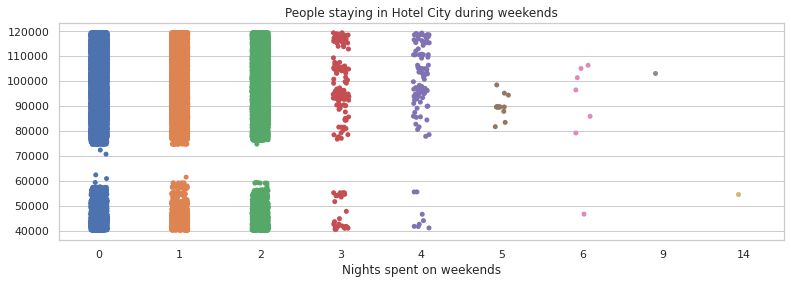

In [ ]:
weekend_df_city = df_hotel_not_cancelled[df_hotel_not_cancelled['hotel']=='City Hotel']['stays_in_weekend_nights']

# making a stripplot to get the booking density during weekdends in City Hotel
f,ax = plt.subplots(figsize=(13,4))
ax = sns.stripplot(y= weekend_df_city.index,x= weekend_df_city.values)
plt.xlabel("Nights spent on weekends")
plt.title("People staying in Hotel City during weekends")

Text(0.5, 1.0, 'People staying in Hotel Resort during weekends')

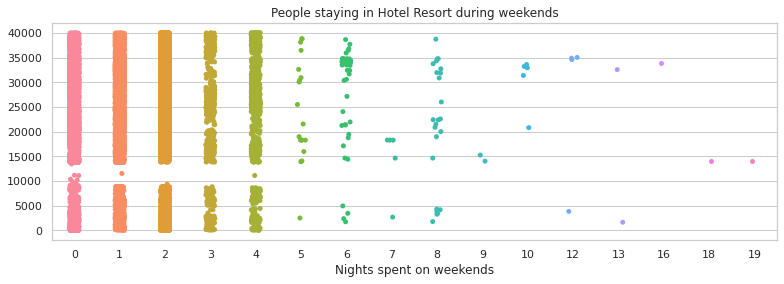

In [ ]:
weekend_df_res = df_hotel_not_cancelled[df_hotel_not_cancelled['hotel']=='Resort Hotel']['stays_in_weekend_nights']

# making a stripplot to get the booking density during weekends in Resort Hotel
f,ax = plt.subplots(figsize=(13,4))
ax = sns.stripplot(y= weekend_df_res.index,x= weekend_df_res.values)
plt.xlabel("Nights spent on weekends")
plt.title("People staying in Hotel Resort during weekends")

**Conclusion:** Guests love to stay in Resort Hotel and they spend around 0-10 nights on an average during Weekdays to around 0-4 nights at max during weekends. While in City hotel guests mostly prefer staying for around 0-7nights on an average in weekdays to 2 days during weekends.

We hope this data will help you planning your holidays accordingly

### <b>Sometimes you may think,
### Will there be visitors from my home country so that we can split our restaurant bills!!</b>

### <b>Do they understand Spanish in Italy? What if they can't understand what I am saying! It Would be nice to have someone from my country!!

### These are some of the common questions that pops up befor planning a journey. And it's quite natural as people always tend to group with people with a common culture and language.</b>


### We have data on customer's info and where they belong, we can't share their numbers with you, but can give you an estimate as to what you can expect throughout your journey. Here they are:

We will only consider those bookings which were not cancelled:

In [ ]:
# Subsetting by the country column

x8 = df_hotel_not_cancelled['country'].value_counts().index[:10]
y8 = df_hotel_not_cancelled['country'].value_counts()[:10]/df_hotel_not_cancelled['country'].value_counts().sum()*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Total Booking (%)'),
 Text(0.5, 0, 'countries'),
 Text(0.5, 1.0, 'Top 10 countries with the most bookings')]

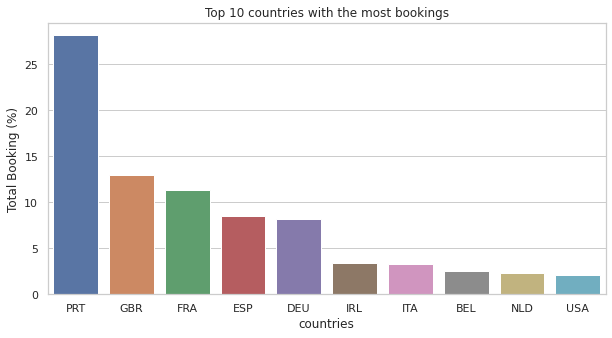

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x8,y8)
ax.set(xlabel='countries', ylabel='Total Booking (%)', title='Top 10 countries with the most bookings')

**Conclusion:**  The countrymen who loves to stay in Hotels the most are from Portugal, and they cover 28% of the overall bookings followed by Germans and French men. 

Did you find your country name in the above chart? If Yes, congratulations, you will have many friends on your journey, and if Not, don't make that sour face, you can always make new friends!!



## **Now that you all may have decided which hotel to book reservations in, we need to discuss the mode of payments that hotel authorities accept. let's us first give you all a basic understanding on the types of deposit these hotels accept:**

Things to expect in this section:

*  A basic understanding on all the three deposit types.
*  The type of deposit that both the hotels prefer the most.
*  We will look at the nature of booking changes based on deposit_type by guests on each hotel












**A basic understanding:**





Here in our dataset, we have three types of Deposit Types:

*   **No Deposit**: These Hotels does't need a credit card to make a deposit of or to hold the reservation. 
*   **Non - Refund**: With a non-refundable deposit type, guests need to pay the full price even if they cancel, or if they don't show up

*   **Refundable**: Here the guests need to pay a small fee for reserving a room in the hotel, and this payment is refunded to them at check-out.

In [ ]:
# Subsetting the hotel column from the parent dataframe to get relevant data for each Hotel Types
df_resort = df_hotel[df_hotel['hotel'] == 'Resort Hotel']
df_city = df_hotel[df_hotel['hotel'] == 'City Hotel']

In [ ]:
# Gathering Deposit type info for both the hotels
df_resort_deposit = pd.DataFrame(df_resort['deposit_type'].value_counts().reset_index())
df_city_deposit = pd.DataFrame(df_city['deposit_type'].value_counts().reset_index())

In [ ]:
df_resort_deposit.rename(columns = {'index':'Deposit_type', 'deposit_type':'Hotel Resort'}, inplace = True)
df_city_deposit.rename(columns = {'index':'Deposit_type', 'deposit_type':'Hotel City'}, inplace = True)

In [ ]:
Deposit_df = pd.merge(df_resort_deposit, df_city_deposit, on = 'Deposit_type')
Deposit_df

,Deposit_type,Hotel Resort,Hotel City
0,No Deposit,38186,66275
1,Non Refund,1719,12868
2,Refundable,142,20


**Conclusion:** From the above table its quite clear, most of the hotels both Resort and City, prefer 'No Deposit' mode of Deposits, that is they neither charge an additional amount and thats the reason bookings are maximum in these hotels.**

### **Let's look at the nature of booking changes on deposit_type by guests on each hotel**

In [ ]:
df_hotel.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

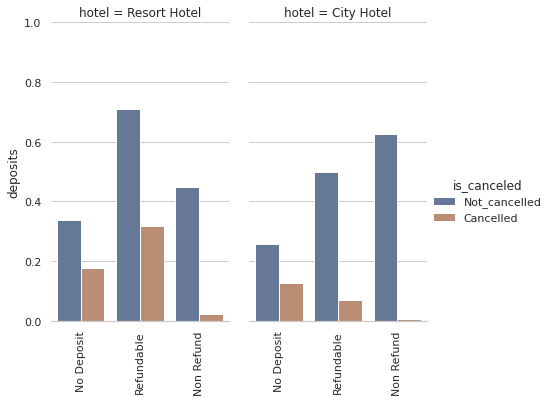

In [ ]:
g = sns.catplot(x="deposit_type", y="booking_changes", col="hotel",
                data=df_hotel, saturation=.5, hue='is_canceled',
                kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "deposits")
  .set_xticklabels(["No Deposit", "Refundable", "Non Refund"])
  .set(ylim=(0, 1))
  .despine(left=True))
g.set_xticklabels(rotation=90) 

 **Conclusion:**In Resort Hotel, 70% of time with successful booking changes had Refundable policy for guests on deposits and also 30% of time with booking changes which got cancelled, the guests got their amount refunded. One more reason of guests to prefer Resort hotel. 40% of time, with booking changes(that didn't got cancelled) had non-refund policy for deposit.

In City Hotel, 60% of time with successful booking changes had Non-Refundable policy of deposit with having very less cancellations on this booking changes. 50% of time with successful booking changes had refundable policy for guests on deposit and only 10% of the booking changes which got cancelled, the guests got the amount refunded.

## <b> Now coming to our climax, we need to talk about cancellations. We want you all to know about the hotels you will be checking in to. This is the final piece of the puzzle and then you are all set to enjoy your holidays </b>

Things to expect in this section:

* We will find out the number of bookings that got cancelled/not-cancelled in each of the hotel types.
*  We will also discuss abut previous cancelations and their relation with repeated guests

on each hotel

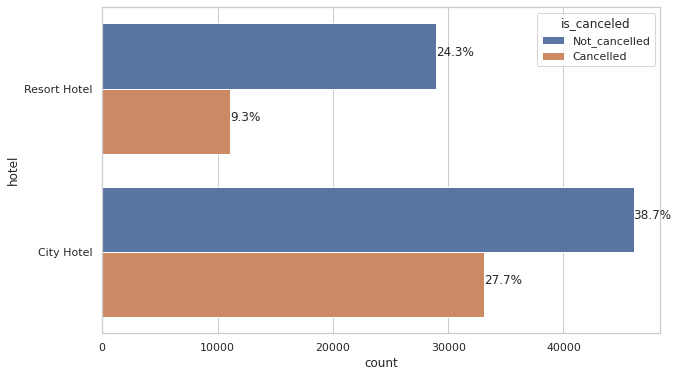

In [ ]:
ax= sns.countplot(data=df_hotel,y='hotel',hue='is_canceled')
sns.set(rc={"figure.figsize": (6, 6)})

total = len(df_hotel['hotel'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

 **Conclusion:** 38.7% of the bookings made in City Hotel were without cancellations, while 24.3% of the bookings didn't get cancelled in Resort.

Around 27.7% of the bookings made in City Hotel got cancelled while Resort hotel had 9.3% of the bookings made in resort Hotel suffered cancellations.

### **Which Hotel sufferred most previous cancellations on bookings ?**

<Figure size 720x576 with 0 Axes>

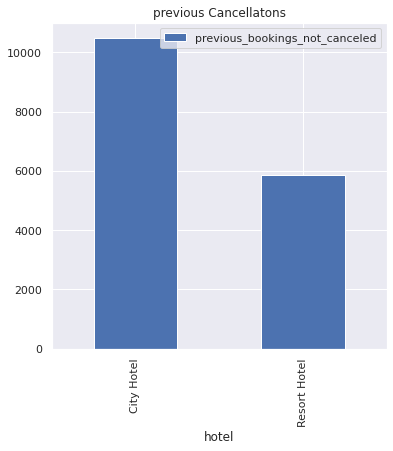

<Figure size 720x576 with 0 Axes>

In [ ]:
plt.rcParams['figure.figsize'] = (6,6)
df_hotel.groupby('hotel').agg({'previous_bookings_not_canceled':sum}).plot(kind='bar')
plt.title('previous Cancellatons')
plt.figure(figsize=(10,8))

**Conclusion:** City Hotel had more than 10,000 previous cancellations as compared to Resort Hotel which is to around 6000 of total bookings.

## <b>Are these hotels worth booking again?? Or are they too overarted??

## <b>Look at what the previous customers say!! </b>

## We would like to share you our info on repeated guests in both the Hotels just to help you all get an idea whether these hotels are worth booking or not</b>

Things to expect in this section:

*  We have only considered successful bookings and eliminated those previous bookings which were cancelled.
*  We have provided you with a bar plot and compared both the hotels in terms of repeated guests whose previous bookings were not cancelled.





In [ ]:
prev_book = pd.crosstab(index=df_hotel['hotel'], 
                     columns=df_hotel['is_repeated_guest'], 
                     values=df_hotel['previous_bookings_not_canceled'], 
                     aggfunc='sum', 
                     normalize='index').applymap('{:.2f}'.format)
                                      

In [ ]:
prev_book

is_repeated_guest,Guest_not_repeated,Repeated_Guests
hotel,,
City Hotel,0.06,0.94
Resort Hotel,0.35,0.65


In [ ]:
prev_book.columns.name = None
Prev_book_df= prev_book.reset_index()
Prev_book_df=Prev_book_df.loc[:,['Guest_not_repeated','Repeated_Guests']].astype('float')

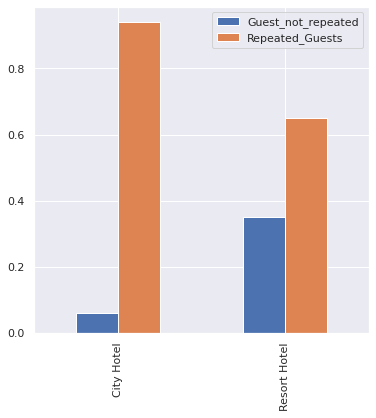

In [ ]:
hotels = ('City Hotel','Resort Hotel')
ax=Prev_book_df[['Guest_not_repeated','Repeated_Guests']].plot(kind='bar')

ax.set_xticklabels(hotels)
plt.show()

**Conclusion:** Around 94% of the bookings which did'nt have previous cancellations were booked by same guests in City Hotel and 6% of the bookings without previous cancellations had no show.
While in Resort hotel 65% of the previous bookings which didn't have previous cancellations were booked by same guests. 35% of the bookings without any previous cancellations had no same guests who booked again.

## <b>Now that we have almost completed all of our analysis, we forgot one question to ask you, Do you all need parking spaces, ofcourse you need info on parking spaces! 

## Lets us help you with information we have on parking spaces requested by customers:</b>

Things to expect in this section:

*  We have plotted a bar plot and analysed the relation between parking spaces and cancellations.
*  We will also provide you with the average number of parking spaces needed by customers in each hotel types.




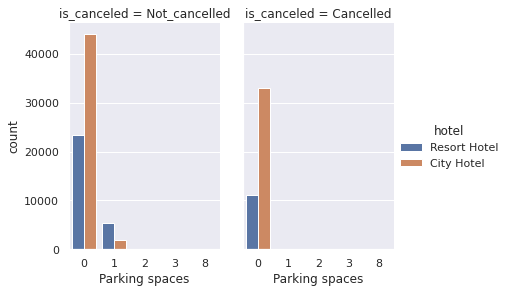

In [ ]:
# Plotting a bar graph between cancellations and parking spaces
g = sns.catplot(x="required_car_parking_spaces", hue="hotel", col="is_canceled",
                data=df_hotel, kind="count",
                height=4, aspect=.7)
g.set_xlabels('Parking spaces')

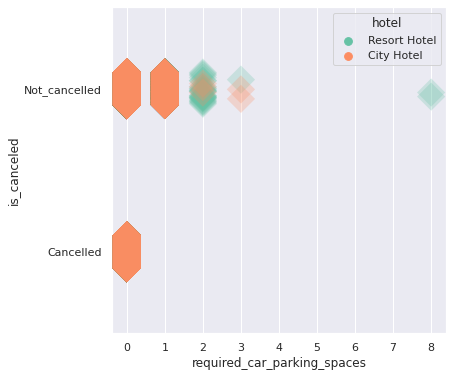

In [ ]:
ax =  sns.stripplot(x="required_car_parking_spaces",y='is_canceled', hue="hotel",
                   data=df_hotel, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)

 **Conclusion:**  Guests who didn't have any cancellations on bookings, opted for parking spaces. Afterall it's quite natural right!! Few of them opted for 3 parking space from City Hotel while at max 8 parking spaces were opted by a few guest at Resort Hotel

## <b>Do you have any special requests that you need to convey to the hotel authoriries??

## Well, I have some good news then, I think we have some analysed data regarding special requests made to the hotels that will solve any queries you have regarding special requests. We have prepared this data specially for you all, please have a look:</b>

Things to expect in this section:


*  We have prepared some data on special requests made by customers and their relation to the rooms getting canceled.
*  Now, no one loves to get their bookings getting cancelled, do they! And as we promised, not a single one of you will have their rooms cancelled. We have derived a secret formula, but for that to know, you have to go through the analysis part.

In [ ]:
#  Let's separate the columns containing special requests and cancelled data for each hotel

requests_df=df_hotel.groupby(['hotel','is_canceled'])['total_of_special_requests'].value_counts().unstack()
requests_df

total_of_special_requests       0      1     2     3    4   5
hotel        is_canceled                                     
City Hotel   Cancelled      26320   4719  1739   279   21   1
             Not_cancelled  21533  16658  6386  1305  177  25
Resort Hotel Cancelled       7214   2597  1127   166   15   1
             Not_cancelled  15134   9209  3700   744  127  13

The table above has six columns labeled **'special requests'** starting from 0 and ending at 1. These numbers denote **the number of special requests** made by a customer

Text(0.5, 1.0, 'Special Requests received by each hotels with thanks')

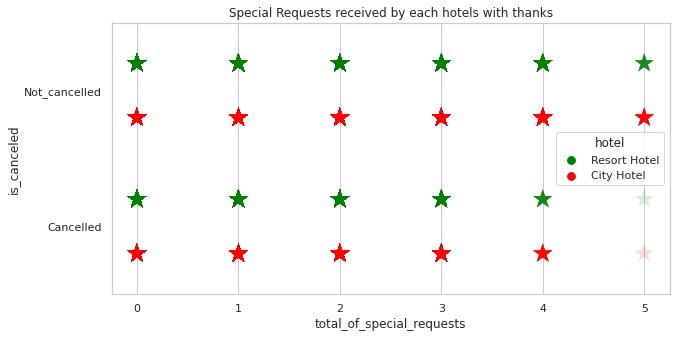

In [ ]:
# let's describe the above table using a stripplot to have a better understanding
sns.set(style="whitegrid")
f,ax = plt.subplots(figsize=(10,5))
ax =  sns.stripplot(x="total_of_special_requests",y='is_canceled', hue="hotel",
                   data=df_hotel, size=20, marker="*",jitter=False, dodge=True,
                   palette={'Resort Hotel': 'green', 'City Hotel': 'red'}, alpha=.15)
ax.set_title('Special Requests received by each hotels with thanks')

**Conclusion:** 

The conclusion that can be drawn from the above plot is this, that both the hotels received special requests upto 5, where the bookings did not get cancelled. While for cancelled bookings, the hotels get upto 4 special requests.
Well, See!! This is the special formula we were talking out!

## **Conclusion:**

That is it everyone! 

Throughout this exercise, we have explained each and every variable in our dataset and explained them in the easiest way possible. We have also checked outliers, and man, there were so many of them!! We have operated on the outliers, removed them so as to make our analysis error-free as much as possible. We have also compared each of our hotel types with repsect to every relevant variable, that affects booking experience so that you all can have a clear cut idea of which hotel to book at the end of our analysis. We have also provided details on payments, ADR and even on cancellations data of each hotel type.

Now that our research is over, your job is still incomplete. We showed you the massive number of customers rushing into hotels into this time of the year, did'nt we?? Its time for you to start packing your bags, book your reservations, and have an awesome time there. Don't forget to tag us on Facebook, we can't wait. to see the adorable pics you all upload on Facebook
